<a href="https://colab.research.google.com/github/Ermiyas21/ICSSWaT/blob/main/Proximity_based_on_HAI_dataet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install fastdtw
# from fastdtw import fastdtw

In [ ]:
# !pip install tensorflow==2.12.0
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM, Dense,Input,Dropout, BatchNormalization
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,accuracy_score,classification_report,precision_recall_curve,precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer,r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import math
import joblib
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [ ]:
# import pandas as pd
HAI_train1 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/train1.xlsx')
HAI_train2 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/test1.xlsx')
df = pd.concat([HAI_train1, HAI_train2])


In [ ]:
# # Sample 0.01% of the combined DataFrame
df_sample = df.sample(frac=0.01, random_state=42)

# # Display the sampled data
df_sample.head(4)

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
360933,2019-11-05 10:15:33,0.1017,1.3820,461.2292,1120.8462,32.0,46.0000,1988.0209,35.7006,27.0000,...,-0.0072,0.0542,353.2082,-0.0012,353.0816,330.8015,0.0,10026.0,27629,normal
216018,2019-09-14 08:00:18,0.1017,1.1220,459.2159,1085.9023,32.0,80.6305,2454.5771,35.9009,36.0000,...,-0.0072,0.0724,339.2651,-0.0006,339.5544,343.4788,0.0,9948.0,27612,normal
233628,2019-09-14 12:53:48,0.0980,1.2983,405.7802,1100.9253,31.0,8.0290,144.1968,35.5009,11.0000,...,82.1542,81.4706,493.8875,0.0004,411.9105,408.5648,0.0,9994.0,27569,normal
491708,2019-11-03 22:48:04,0.1014,1.4271,395.5119,1087.4227,32.0,25.7028,873.9625,35.8143,15.4164,...,67.2092,67.5456,399.8300,0.0009,334.1472,337.0949,47.0,10043.0,27614,normal


In [ ]:
df_sample2=df_sample.copy()
df_sample2.head(2)


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
360933,2019-11-05 10:15:33,0.1017,1.382,461.2292,1120.8462,32.0,46.0000,1988.0209,35.7006,27.0,...,-0.0072,0.0542,353.2082,-0.0012,353.0816,330.8015,0.0,10026.0,27629,normal
216018,2019-09-14 08:00:18,0.1017,1.122,459.2159,1085.9023,32.0,80.6305,2454.5771,35.9009,36.0,...,-0.0072,0.0724,339.2651,-0.0006,339.5544,343.4788,0.0,9948.0,27612,normal


In [ ]:
# Put the time as index
df_sample2['time'] = pd.to_datetime(df_sample2['time'])
df_sample2= df_sample2.set_index('time')

In [ ]:
# display the dataframe
df_sample2.head(2)

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-11-05 10:15:33,0.1017,1.382,461.2292,1120.8462,32.0,46.0000,1988.0209,35.7006,27.0,27.9709,...,-0.0072,0.0542,353.2082,-0.0012,353.0816,330.8015,0.0,10026.0,27629,normal
2019-09-14 08:00:18,0.1017,1.122,459.2159,1085.9023,32.0,80.6305,2454.5771,35.9009,36.0,37.4695,...,-0.0072,0.0724,339.2651,-0.0006,339.5544,343.4788,0.0,9948.0,27612,normal


In [ ]:
# Replacing 'A ttack' with 'Attack' in the 'attack' column
df_sample2['attack'] = df_sample2['attack'].replace('A ttack')# , 'Attack ')
# Replacing 'A ttack' with 'Attack' in the 'attack' column
df_sample2['attack'] = df_sample2['attack'].replace('Attack ')# , 'Attack ')


<ipython-input-8-efe489929587>:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_sample2['attack'] = df_sample2['attack'].replace('A ttack')# , 'Attack ')
<ipython-input-8-efe489929587>:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_sample2['attack'] = df_sample2['attack'].replace('Attack ')# , 'Attack ')


In [ ]:
# Now do the replacement
df_sample2['attack'] = df_sample2['attack'].replace({'Attack': 1, 'normal': 0})

<ipython-input-9-8f9d0b3adc49>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sample2['attack'] = df_sample2['attack'].replace({'Attack': 1, 'normal': 0})


In [ ]:
attack_values = df_sample2['attack'].unique()
attack_values

array([0, 1])

In [ ]:
df_sample2.rename(columns={'attack': 'label'}, inplace=True)

In [ ]:
df_sample2.head(2)

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,label
time,,,,,,,,,,,,,,,,,,,,,
2019-11-05 10:15:33,0.1017,1.382,461.2292,1120.8462,32.0,46.0000,1988.0209,35.7006,27.0,27.9709,...,-0.0072,0.0542,353.2082,-0.0012,353.0816,330.8015,0.0,10026.0,27629,0
2019-09-14 08:00:18,0.1017,1.122,459.2159,1085.9023,32.0,80.6305,2454.5771,35.9009,36.0,37.4695,...,-0.0072,0.0724,339.2651,-0.0006,339.5544,343.4788,0.0,9948.0,27612,0


In [ ]:
# Using list comprehensions to classify numerical and categorical features
numerical_features = [column for column in df_sample2.columns if df_sample2[column].nunique() > 10]
categorical_features = [column for column in df_sample2.columns if df_sample2[column].nunique() <= 10]
print(len(numerical_features), 'Numerical Features :', numerical_features, len(categorical_features), 'Categorical Features :', categorical_features)

48 Numerical Features : ['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4005', 'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D', 'P1_FCV02Z', 'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02', 'P1_FT02Z', 'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01', 'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02Z', 'P1_PIT01', 'P1_PIT02', 'P1_TIT01', 'P1_TIT02', 'P2_24Vdc', 'P2_SIT01', 'P2_VT01e', 'P2_VXT02', 'P2_VXT03', 'P2_VYT02', 'P2_VYT03', 'P3_LCP01D', 'P3_LCV01D', 'P3_LT01', 'P4_HT_FD', 'P4_HT_LD', 'P4_HT_PO', 'P4_LD', 'P4_ST_FD', 'P4_ST_LD', 'P4_ST_PO', 'P4_ST_PT01', 'P4_ST_TT01'] 5 Categorical Features : ['P1_B4002', 'P1_PCV02D', 'P2_SD01', 'P4_ST_PS', 'label']


In [ ]:
# Display unique values in each column
for column in categorical_features:
    unique_values = df_sample2[column].unique()
    print(f"Unique Values in '{column}' Column:")
    print(unique_values)
    print("\n")

Unique Values in 'P1_B4002' Column:
[32.     31.     29.4139 29.6332 30.     29.     30.3728]


Unique Values in 'P1_PCV02D' Column:
[12 25 15 14 22 13]


Unique Values in 'P2_SD01' Column:
[ 0 20]


Unique Values in 'P4_ST_PS' Column:
[ 0.     47.     50.     50.4048 52.     49.7998 49.0655 50.9871 51.
 48.    ]


Unique Values in 'label' Column:
[0 1]




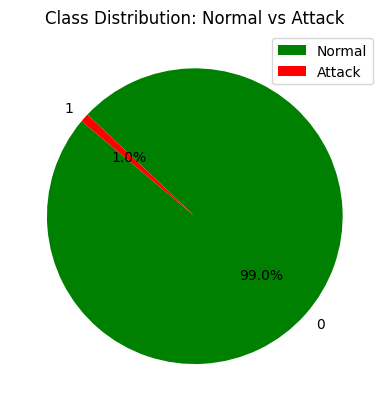

In [ ]:
# Count the number of occurrences of each class in the target series
class_distribution = df_sample2['label'].value_counts()

# Plotting the class distribution as a pie chart
fig, ax = plt.subplots()
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red'], ax=ax)

plt.title('Class Distribution: Normal vs Attack')
plt.ylabel('')

# Replace the numerical labels with the actual class names
class_labels = ['Normal' if x == 0 else 'Attack' for x in class_distribution.index]

plt.legend(labels=class_labels)

plt.show()

In [ ]:
target = df_sample2['label']
target = target.reset_index(drop=True)

ds = df_sample2.drop('label', axis=1)

In [ ]:
# !pip install -U imbalanced-learn

### blancing the label

In [ ]:
from imblearn.over_sampling import SMOTENC

# Item to be dropped
item_to_drop = 'label'

# Creating a new list without the item to drop
categorical_features = [item for item in categorical_features if item != item_to_drop]

print(categorical_features)

['P1_B4002', 'P1_PCV02D', 'P2_SD01', 'P4_ST_PS']


In [ ]:
# Convert column names to indices
categorical_features_indices = [ds.columns.get_loc(name) for name in categorical_features]

# Use the indices for SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)

# Fit and resample the dataset
X_resampled, y_resampled = smote_nc.fit_resample(ds, target)

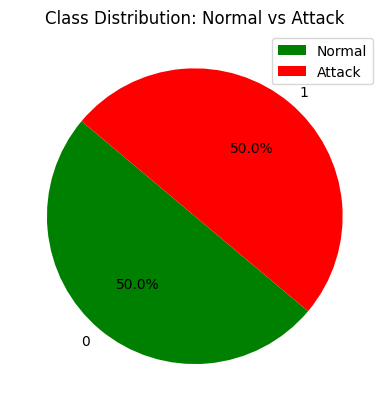

In [ ]:
# Count the number of occurrences of each class in the target series
class_distribution = y_resampled.value_counts()

# Plotting the class distribution as a pie chart
fig, ax = plt.subplots()
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red'], ax=ax)

plt.title('Class Distribution: Normal vs Attack')
plt.ylabel('')  # Hide the y-label as it's not needed in pie charts

# Replace the numerical labels with the actual class names
class_labels = ['Normal' if x == 0 else 'Attack' for x in class_distribution.index]

plt.legend(labels=class_labels)

plt.show()

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(19700, 52)
(19700,)


### Normalization


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

num_features = X_resampled[numerical_features]
cat_features = X_resampled[categorical_features]

# Min-Max scaling for numerical features
scaler = MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(num_features)
numerical_data_scaled_df = pd.DataFrame(numerical_data_scaled, columns=num_features.columns)

# Since categorical features are already binary, just ensure they are in the correct format
cat_features_df = pd.DataFrame(cat_features, columns=categorical_features)

# Concatenate numerical and categorical dataframes
preprocessed_ds = pd.concat([numerical_data_scaled_df, cat_features_df], axis=1)

display(preprocessed_ds.head())

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,P1_FCV02D,...,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PT01,P4_ST_TT01,P1_B4002,P1_PCV02D,P2_SD01,P4_ST_PS
0,0.997245,0.605697,0.854468,1.000000,0.460000,0.686167,0.736393,0.270000,0.274915,0.0,...,0.453240,0.482759,0.652008,0.493761,0.500000,0.995215,32.0,12,0,0.0
1,0.997245,0.352063,0.829508,0.820623,0.806305,0.848759,0.781572,0.360000,0.369126,0.0,...,0.401029,0.517241,0.578746,0.560530,0.371711,0.913876,32.0,12,20,0.0
2,0.946281,0.524046,0.167036,0.897740,0.080290,0.043607,0.691350,0.110000,0.101475,1.0,...,0.980023,0.574713,0.970617,0.903324,0.447368,0.708134,31.0,12,20,0.0
3,0.993113,0.649693,0.039734,0.828427,0.257028,0.297925,0.762039,0.154164,0.134545,0.0,...,0.627819,0.603448,0.549462,0.526907,0.527961,0.923445,32.0,12,0,47.0
4,0.982094,0.587162,0.134640,0.843544,0.060000,0.013151,0.726334,0.070000,0.056678,1.0,...,0.326674,0.454023,0.468463,0.447185,0.500000,0.985646,32.0,12,0,50.0


### Train test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_ds, y_resampled, test_size=0.3, random_state=42)

# Filter X_train based on y_train == 0 *before* printing shapes
X_train_filtered = X_train[y_train == 0]
y_train_filtered = y_train[y_train == 0]


print("Training data shape (X):", X_train_filtered.shape)
print("Training data shape (y):", y_train_filtered.shape)
print("Test data shape (X):", X_test.shape)
print("Test data shape (y):", y_test.shape)

Training data shape (X): (6854, 52)
Training data shape (y): (6854,)
Test data shape (X): (5910, 52)
Test data shape (y): (5910,)


### OCSVM

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

# Set a global random seed for reproducibility
np.random.seed(42)

# Scale the data (Important for OneClassSVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'nu': [0.1, 0.5, 0.9],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(OneClassSVM(), param_grid, scoring='f1_weighted')
grid_search.fit(X_train_filtered, y_train_filtered)
best_params = grid_search.best_params_

# Create and train the model with the best parameters
svm_model = OneClassSVM(**best_params)
svm_model.fit(X_train_scaled)

# Predict with the trained model
y_pred = svm_model.predict(X_test_scaled)

# Convert the -1 (outliers) to 0 and 1 (inliers) for evaluation
y_pred = (y_pred == 1).astype(int)  # Convert -1 to 0 and 1 to 1 for consistency with labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Output the results
print("Accuracy on Test Data:", accuracy)
print("Precision on Test Data:", precision)
print("Recall on Test Data:", recall)
print("F1 Score on Test Data:", f1)

Accuracy on Test Data: 0.5984771573604061
Precision on Test Data: 0.6265300786342969
Recall on Test Data: 0.5984771573604061
F1 Score on Test Data: 0.5765671125573574


 #### GMM

In [ ]:

from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Define the parameter distribution for RandomizedSearchCV for GMM
param_distributions_gmm = {
    'n_components': range(2, 10),  # Number of components in the mixture
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'random_state': [42]
}

# Create the GMM model
gmm_model = GaussianMixture()

# Create the RandomizedSearchCV object for GMM
random_search_gmm = RandomizedSearchCV(estimator=gmm_model,
                                       param_distributions=param_distributions_gmm,
                                       n_iter=50,
                                       cv=3,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       verbose=2,
                                       random_state=42)

# Fit the random search to the data
random_search_gmm.fit(X_train_filtered, y_train_filtered)

# Get the best hyperparameters and model for GMM
best_params_gmm = random_search_gmm.best_params_
print("Best Hyperparameters (GMM):", best_params_gmm)
best_gmm_model = random_search_gmm.best_estimator_

# Predict using the best GMM model
y_pred_gmm = best_gmm_model.predict(X_test)


# Adjust prediction to match original labels (assuming 0 is normal)
y_pred_gmm_adjusted = [1 if pred > 0 else 0 for pred in y_pred_gmm]


# Evaluate the best GMM model
accuracy_gmm = accuracy_score(y_test, y_pred_gmm_adjusted)
precision_gmm = precision_score(y_test, y_pred_gmm_adjusted, average='weighted')
recall_gmm = recall_score(y_test, y_pred_gmm_adjusted, average='weighted')
f1_gmm = f1_score(y_test, y_pred_gmm_adjusted, average='weighted')


print("GMM - Accuracy on Test Data:", accuracy_gmm)
print("GMM - Precision on Test Data:", precision_gmm)
print("GMM - Recall on Test Data:", recall_gmm)
print("GMM - F1 Score on Test Data:", f1_gmm)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Hyperparameters (GMM): {'random_state': 42, 'n_components': 2, 'covariance_type': 'full'}
GMM - Accuracy on Test Data: 0.36598984771573606
GMM - Precision on Test Data: 0.21597510020806482
GMM - Recall on Test Data: 0.36598984771573606
GMM - F1 Score on Test Data: 0.2716476114842921


### Index based KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTENC

# SMOTENC on training data only
categorical_features = [0, 1]  # Replace with actual categorical indices
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# Set up a very simple, index-based KNN model
simple_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(
        n_neighbors=1,
        weights='uniform',
        algorithm='brute',
        p=2  # Euclidean distance
    ))
])

# Train the model
simple_knn.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_knn = simple_knn.predict(X_test)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

# Output scores
print("KNN - Accuracy :", round(accuracy_knn, 4))
print("KNN - Precision :", round(precision_knn, 4))
print("KNN - Recall :", round(recall_knn, 4))
print("KNN - F1 Score:", round(f1_knn, 4))


KNN - Accuracy : 0.998
KNN - Precision : 0.998
KNN - Recall : 0.998
KNN - F1 Score: 0.998
